# Combined Visualizations for all models

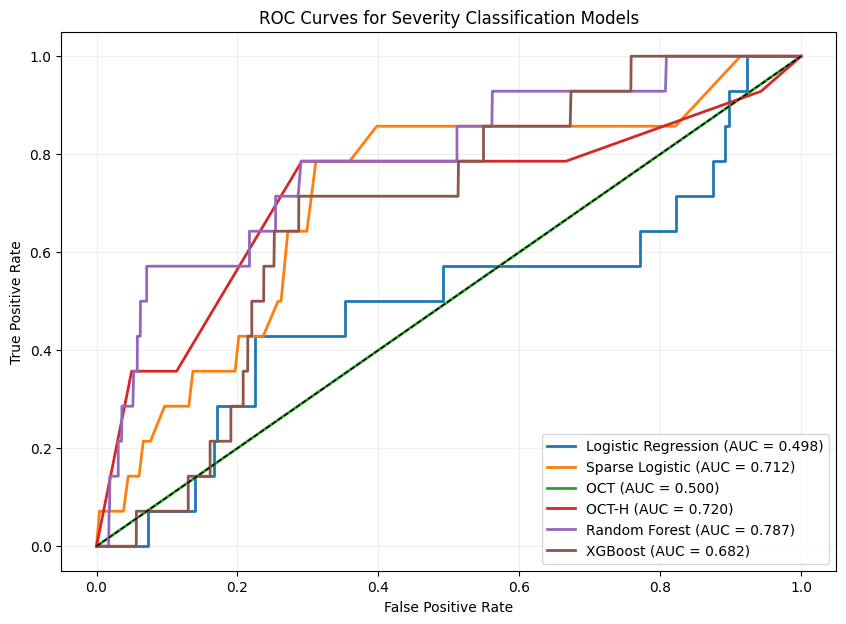

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Load test labels
test_df = pd.read_csv("test_df.csv")
y_test = test_df["HighSeverity_int"].values
N_TEST = len(y_test)   # should be 5168

def load_yhat_test(path, n_test):
    full = pd.read_csv(path).values.ravel()
    return full[-n_test:]   # last 5168

yhat_logistic = load_yhat_test("logit_y_hat.csv", N_TEST)
yhat_sparse   = load_yhat_test("sparseyhat.csv", N_TEST)
yhat_oct      = load_yhat_test("sparseyhat_octrecall.csv", N_TEST)
yhat_oct_h    = load_yhat_test("sparseyhat_octhrecall.csv", N_TEST)
yhat_rf       = load_yhat_test("sparseyhat_rf.csv", N_TEST)
yhat_xgb      = load_yhat_test("sparseyhat_xg.csv", N_TEST)


models = {
    "Logistic Regression":  yhat_logistic,
    "Sparse Logistic":      yhat_sparse,
    "OCT":                  yhat_oct,
    "OCT-H":                yhat_oct_h,
    "Random Forest":        yhat_rf,
    "XGBoost":              yhat_xgb
}

plt.figure(figsize=(10, 7))

for name, yhat in models.items():
    fpr, tpr, _ = roc_curve(y_test, yhat)
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_val:.3f})")
# plot ROC curves

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Severity Classification Models")
plt.legend(loc="lower right")

plt.grid(alpha=0.2)
plt.savefig("figure2_roc_curves.png", dpi=300, bbox_inches='tight')
plt.show()



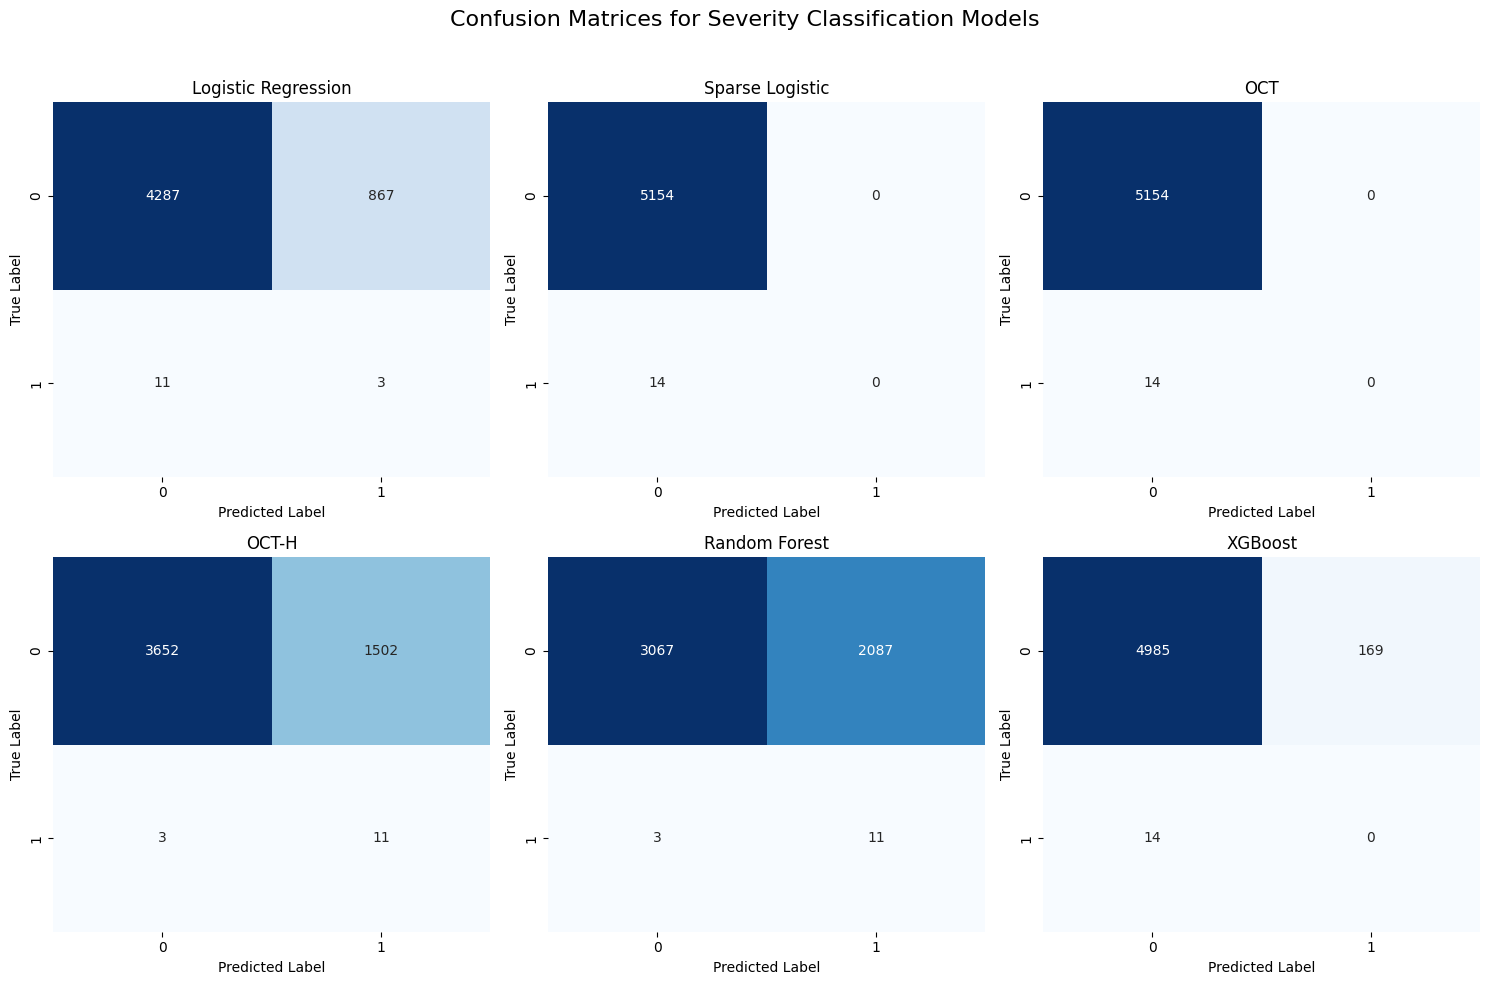

Saved figure3_confusion_matrices.png


In [9]:
# Helper: Convert probabilities to 0/1
def to_labels(p, threshold=0.5):
    return (p >= threshold).astype(int)

# Create confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (name, preds) in zip(axes, model_preds.items()):
    y_pred = to_labels(preds)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        ax=ax
    )

    ax.set_title(name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.suptitle("Confusion Matrices for Severity Classification Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig("figure3_confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

print("Saved figure3_confusion_matrices.png")
